In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
wal = pd.read_csv('/content/WALMART_SALES_DATA.csv')

In [ ]:
#dataset over view
wal.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
#Dataset statistics
wal.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
#check for null values
wal.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

FINDING STORE WITH THE MAXIMUM SALE

In [ ]:
weekly_sales_by_store = wal.groupby('Store').sum()['Weekly_Sales'].sort_values(ascending = False).head()

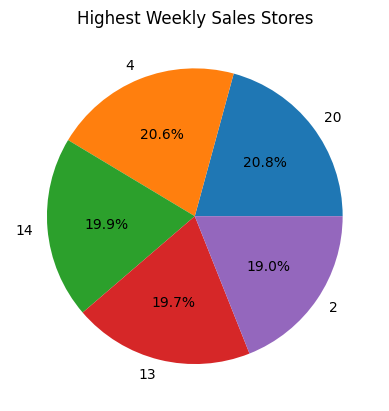

In [ ]:
# Get the top 5 stores with the highest weekly sales
top_stores = weekly_sales_by_store.head()

# Create a pie chart of the weekly sales data for the top 5 stores
plt.pie(top_stores.values, labels=top_stores.index, autopct='%1.1f%%')
plt.title("Highest Weekly Sales Stores")
plt.show()

In [ ]:
data = wal.groupby('Store').sum()['Weekly_Sales'].sort_values(ascending=False)
data

Store
20    3.013978e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
4     2.631574e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
24    1.940160e+08
11    1.939628e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
26    1.425989e+08
23    1.399826e+08
34    1.382498e+08
35    1.315207e+08
8     1.299512e+08
17    1.266991e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
40    9.669790e+07
43    9.056544e+07
15    8.913368e+07
7     8.104025e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
28    2.110677e+07
12    1.638671e+07
38    7.347379e+06
Name: Weekly_Sales, dtype: float64

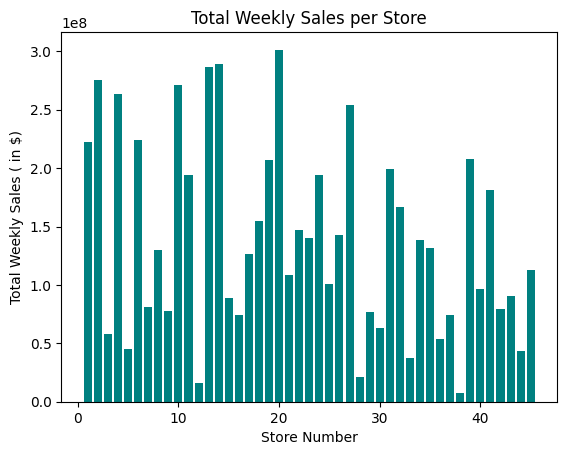

In [ ]:
# bar graph
plt.bar(data.index, data.values,color='teal')
plt.xlabel('Store Number')
plt.ylabel('Total Weekly Sales ( in $)')
plt.title('Total Weekly Sales per Store')
plt.show()

STORE WITH MAXIMUM VARYING SALE

In [ ]:
std_sales_by_store = wal.groupby('Store').std()['Weekly_Sales'].sort_values(ascending = False).head()

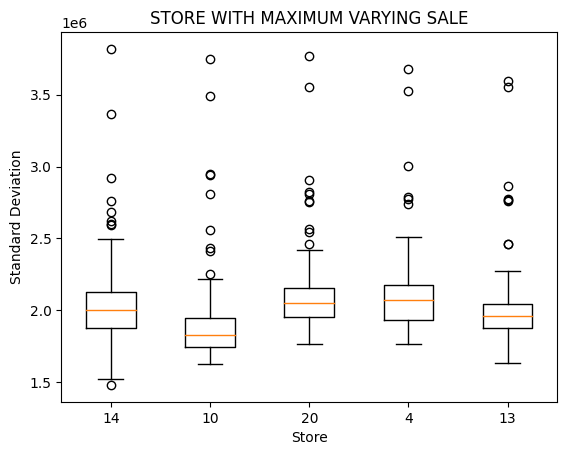

In [ ]:
# Get the top 5 stores with the highest standard deviation of weekly sales
top_stores = std_sales_by_store.head()

# Create a box plot of the standard deviation of weekly sales for the top 5 stores
plt.boxplot([wal[wal['Store'] == store]['Weekly_Sales'] for store in top_stores.index], labels=top_stores.index)
plt.title("STORE WITH MAXIMUM VARYING SALE")
plt.xlabel("Store")
plt.ylabel("Standard Deviation")
plt.show()

In [ ]:
# Calculating Coefficient of Variation (Coeff_V)

# Equation used :
# Coeff_V= The Standard Deviation of dataset / The mean of dataset

Coeff_V = wal.groupby('Store').std()['Weekly_Sales'] / wal.groupby('Store').mean()['Weekly_Sales']
Coeff_V = Coeff_V.reset_index().rename(columns = {'Weekly_Sales': 'Coefficient of Variation'})

Coeff_V.head()

,Store,Coefficient of Variation
0,1,0.100292
1,2,0.123424
2,3,0.115021
3,4,0.127083
4,5,0.118668


In [ ]:
# Store with Maximum Coeff_V
Coeff_V.sort_values(by='Coefficient of Variation', ascending = False).head()

,Store,Coefficient of Variation
34,35,0.229681
6,7,0.197305
14,15,0.193384
28,29,0.183742
22,23,0.179721


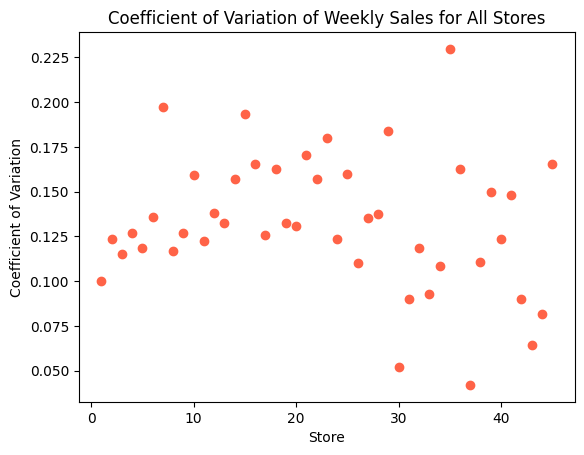

In [ ]:
# Creating a scatter plot of the coefficient of variation of weekly sales for all stores
plt.scatter(Coeff_V['Store'], Coeff_V['Coefficient of Variation'],  color= '#FF6347')
plt.title("Coefficient of Variation of Weekly Sales for All Stores")
plt.xlabel("Store")
plt.ylabel("Coefficient of Variation")
plt.show()

Conclusion - Store 14 had the maximum standard deviation in Weekly Sales. Additionally, Store 35 has the maximum coefficient of variation at approximately 0.299

WHICH STORE HAS GOOD QUATERLY GROWTH IN Q3'2023

In [ ]:
# Converting Date column to datetime object
wal['Date'] = pd.to_datetime(wal['Date'], format="%d-%m-%Y")
wal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [ ]:
# Extracting the year and month
wal['Year'] = pd.DatetimeIndex(wal['Date']).year
wal['Month'] = pd.DatetimeIndex(wal['Date']).month
wal.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3


In [ ]:
# Quarter 3 i.e. from month July (6) to September (9) and Year 2012

wal_q3_2012 = wal[(wal['Month'].isin([6,7,8,9])) & (wal['Year'] == 2012)]
wal_q3_2012.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
121,1,2012-06-01,1624477.58,0,77.95,3.501,221.747214,7.143,2012,6
122,1,2012-06-08,1697230.96,0,78.30,3.452,221.749484,7.143,2012,6
123,1,2012-06-15,1630607.00,0,79.35,3.393,221.762642,7.143,2012,6
124,1,2012-06-22,1527845.81,0,78.39,3.346,221.803021,7.143,2012,6
125,1,2012-06-29,1540421.49,0,84.88,3.286,221.843400,7.143,2012,6


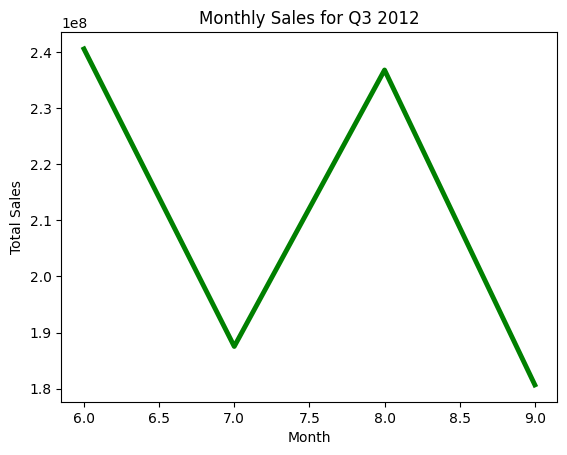

In [ ]:
# Creating a line chart of the weekly sales for the third quarter of 2012
weekly_sales_q3_2012 = wal_q3_2012.groupby('Month')['Weekly_Sales'].sum()
weekly_sales_q3_2012.plot(kind='line', color='green', linewidth=3.5)
plt.title("Monthly Sales for Q3 2012")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

STORES WITH MAXIMUM SALES ($)

PERCENTAGE CHANGE (growth rate)

In [ ]:
wal_q3_2012['Date'].iloc[0] , wal_q3_2012['Date'].iloc[-1]

(Timestamp('2012-06-01 00:00:00'), Timestamp('2012-09-28 00:00:00'))

In [ ]:
per_change = wal_q3_2012[(wal_q3_2012['Date']=='2012-06-01') | (wal_q3_2012['Date']=='2012-09-28')]
per_change

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
121,1,2012-06-01,1624477.58,0,77.95,3.501,221.747214,7.143,2012,6
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908,2012,9
264,2,2012-06-01,1910092.37,0,78.38,3.501,221.385275,6.891,2012,6
281,2,2012-09-28,1746470.56,0,79.45,3.666,222.616433,6.565,2012,9
407,3,2012-06-01,432268.53,0,81.55,3.501,225.251831,6.664,2012,6
...,...,...,...,...,...,...,...,...,...,...
6144,43,2012-09-28,577792.32,0,77.55,3.666,214.305250,9.285,2012,9
6270,44,2012-06-01,323410.94,0,61.11,3.788,130.959226,5.621,2012,6
6287,44,2012-09-28,355307.94,0,64.80,3.821,131.043000,5.407,2012,9
6413,45,2012-06-01,837144.63,0,74.48,3.742,191.009171,8.567,2012,6


In [ ]:
pct=per_change.groupby('Store')['Weekly_Sales'].pct_change().dropna().reset_index().rename(columns={'index':'Store','Weekly_Sales':'%Change'})
pct.head()

,Store,%Change
0,138,-0.115371
1,281,-0.085662
2,424,-0.098216
3,567,-0.069626
4,710,-0.138179


In [ ]:
pct['Store']=per_change['Store'].unique()
pct.head()

,Store,%Change
0,1,-0.115371
1,2,-0.085662
2,3,-0.098216
3,4,-0.069626
4,5,-0.138179


In [ ]:
# Top performing WM Stores during Q3 2012

pct.sort_values(by='%Change',ascending=False).head()

,Store,%Change
43,44,0.098627
16,17,0.036001
31,32,-0.000386
29,30,-0.003773
36,37,-0.007256


Store 17 and 44 were the only two Wm Stores that have increased their weekly sales during Quarter 3 of year 2012

In [ ]:
# Decrease in weekly sales a lot during Q3 2012
pp = pct.sort_values(by='%Change',ascending=False).tail()
pp

,Store,%Change
28,29,-0.150243
14,15,-0.165774
5,6,-0.185584
26,27,-0.189384
13,14,-0.257125


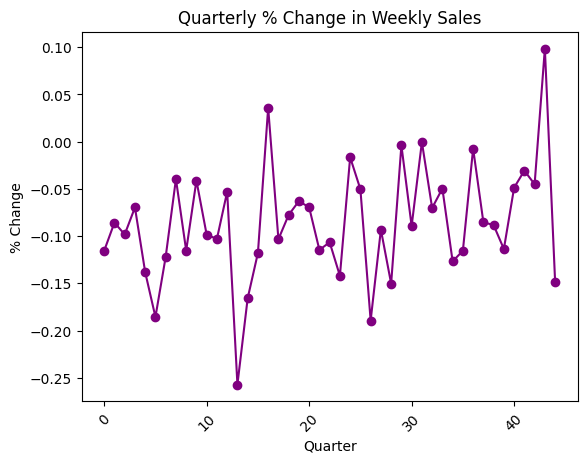

In [ ]:
plt.plot(pct.index, pct['%Change'], marker='o', color='purple')
plt.xlabel('Quarter')
plt.ylabel('% Change')
plt.title('Quarterly % Change in Weekly Sales')
plt.xticks(rotation=45)
plt.show()

SOME HOLIDAYS HAVE A NEGATIVE IMPACT ON SALES. FIND OUT HOLIDAYS WHICH HAVE HIGHER SALES THAN THE MEAN SALES IN NON-HOLIDAY SEASON FOR ALL STORES TOGETHER



* Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
* Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13  
* Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
* Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13









In [ ]:
# Creating Holiday Dataframe
holiday = wal[wal['Holiday_Flag']==1]
holiday.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625,2011,9
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523,2011,11
6391,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523,2011,12
6397,45,2012-02-10,803657.12,1,37.00,3.640,189.707605,8.424,2012,2
6427,45,2012-09-07,766512.66,1,75.70,3.911,191.577676,8.684,2012,9


In [ ]:
# Holiday Dates
holiday['Date'].value_counts()

2010-02-12    45
2010-09-10    45
2010-11-26    45
2010-12-31    45
2011-02-11    45
2011-09-09    45
2011-11-25    45
2011-12-30    45
2012-02-10    45
2012-09-07    45
Name: Date, dtype: int64

In [ ]:
# Assigning Holiday Name to Each presented date to make it easier for comparison

from datetime import datetime
sb=[datetime.strptime(date,"%d-%b-%y").date() for date in '12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13'.split(", ")]
lbrd=[datetime.strptime(date,"%d-%b-%y").date() for date in '10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13'.split(", ")]
thnkg=[datetime.strptime(date,"%d-%b-%y").date() for date in '26-Nov-19, 25-Nov-11, 23-Nov-12, 29-Nov-13'.split(", ")]
chrd=[datetime.strptime(date,"%d-%b-%y").date() for date in '31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13'.split(", ")]

def assign_holiday(date):
  if date in sb:
    return 'Super Bowl'
  elif date in lbrd:
    return 'Labour Day'
  elif date in thnkg:
    return 'Thanksgiving'
  elif date in chrd:
    return 'Christmas'
  else:
    return 'Not Holiday'

holiday["Occasion"] = holiday['Date'].apply(lambda date: assign_holiday(date))
holiday.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Occasion
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,Super Bowl
31,1,2010-09-10,1507460.69,1,78.69,2.565,211.495190,7.787,2010,9,Labour Day
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,2010,11,Not Holiday
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,2010,12,Christmas
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742,2011,2,Super Bowl


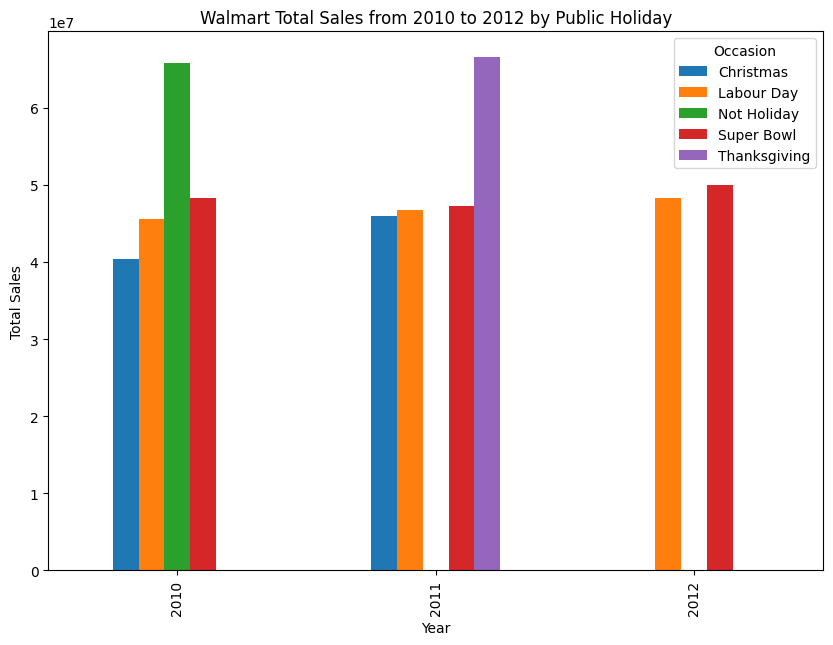

In [ ]:

# Group data by year and occasion
holiday_year = holiday.groupby(['Year', 'Occasion']).sum().reset_index()

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 7))

# Plot data as grouped bars
holiday_year.pivot(index='Year', columns='Occasion', values='Weekly_Sales').plot(kind='bar', ax=ax)

# Set title and axis labels
ax.set_title('Walmart Total Sales from 2010 to 2012 by Public Holiday')
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales')

# Display plot
plt.show()

In [ ]:
# Mean sales in non-holiday season for all stores together

non_holiday_mean_sales = wal[wal['Holiday_Flag']==0]['Weekly_Sales'].mean()
non_holiday_mean_sales/10**6

1.0412563802088555

In [ ]:
# Holiday Sales that is greater than mean
holiday.groupby('Occasion')['Weekly_Sales'].mean()/10**6

Occasion
Christmas       0.960833
Labour Day      1.042427
Not Holiday     1.462689
Super Bowl      1.079128
Thanksgiving    1.479858
Name: Weekly_Sales, dtype: float64

PROVIDE A MONTHLY AND SEMESTER VIEW OF SALES IN UNITS AND GIVE INSIGHTS

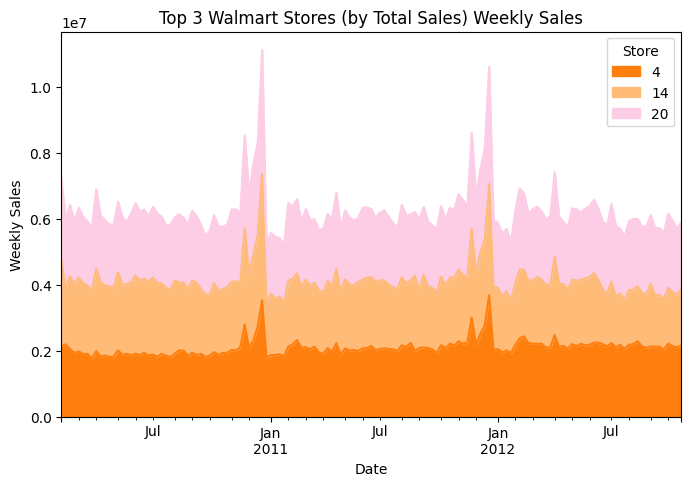

In [ ]:
sales=wal.groupby('Store').sum().sort_values(by='Weekly_Sales',ascending=False).iloc[:3].index.to_list()
wm_top_stores = wal[wal['Store'].isin(sales)]

# Pivot the data to create a DataFrame with columns for each store
pivot_df = wm_top_stores.pivot(index='Date', columns='Store', values='Weekly_Sales')

# Define a list of colors
colors = ['#ff7f0e', '#ffbb78', '#fccde5']

# Create a stacked area chart
pivot_df.plot(kind='area', stacked=True, figsize=(8, 5),color=colors)

# Set title and axis labels
plt.title('Top 3 Walmart Stores (by Total Sales) Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')

# Display plot
plt.show()

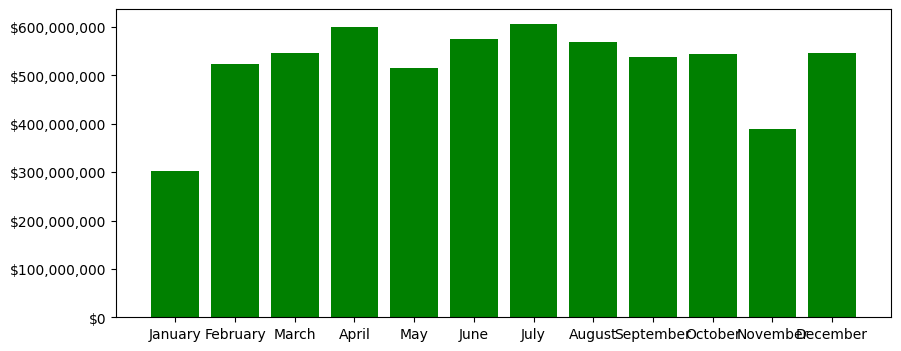

In [ ]:
# Monthly Sales
import calendar

monthly_sales = wal.groupby("Month")['Weekly_Sales'].sum()
months = [calendar.month_name[n] for n in range(1,13)]


fig ,ax = plt.subplots(figsize=(10,4))
ax.bar(months, monthly_sales, color='green')
ax.yaxis.set_major_formatter('${x:,.0f}')
plt.show()

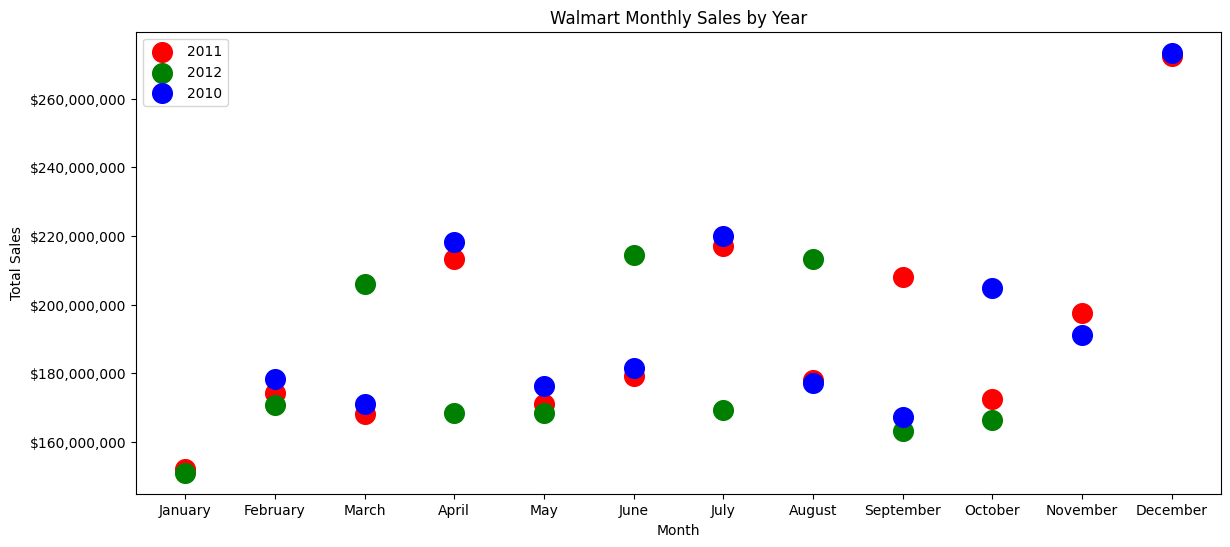

In [ ]:


# Group data by month and year and calculate total sales
monthly_sales = wal.groupby(['Month', 'Year'])['Weekly_Sales'].sum().reset_index()

# Create a scatter plot with different colors for each year
fig, ax = plt.subplots(figsize=(14, 6))
for year, color in zip(monthly_sales['Year'].unique(), ['red', 'green', 'blue']):
    data = monthly_sales[monthly_sales['Year'] == year]
    ax.scatter(data['Month'], data['Weekly_Sales'], label=str(year), color=color,s=200)

# Set title and axis labels
ax.set(title='Walmart Monthly Sales by Year', xlabel='Month', ylabel='Total Sales')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.legend()
plt.xticks(ticks=range(1, 13), labels=[calendar.month_name[n] for n in range(1, 13)])

# Display plot
plt.show()


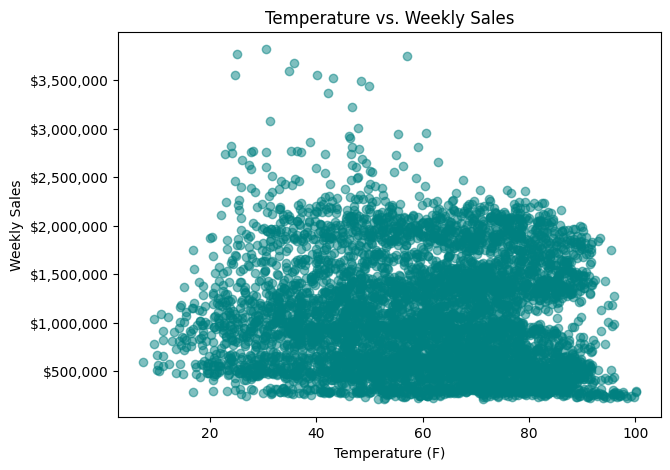

In [ ]:
import matplotlib.pyplot as plt

# Create scatter plot of temperature vs. sales
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(wal['Temperature'], wal['Weekly_Sales'], alpha=0.5,color ='teal')

# Set title and axis labels
ax.set(title='Temperature vs. Weekly Sales', xlabel='Temperature (F)', ylabel='Weekly Sales')
ax.yaxis.set_major_formatter('${x:,.0f}')

# Display plot
plt.show()

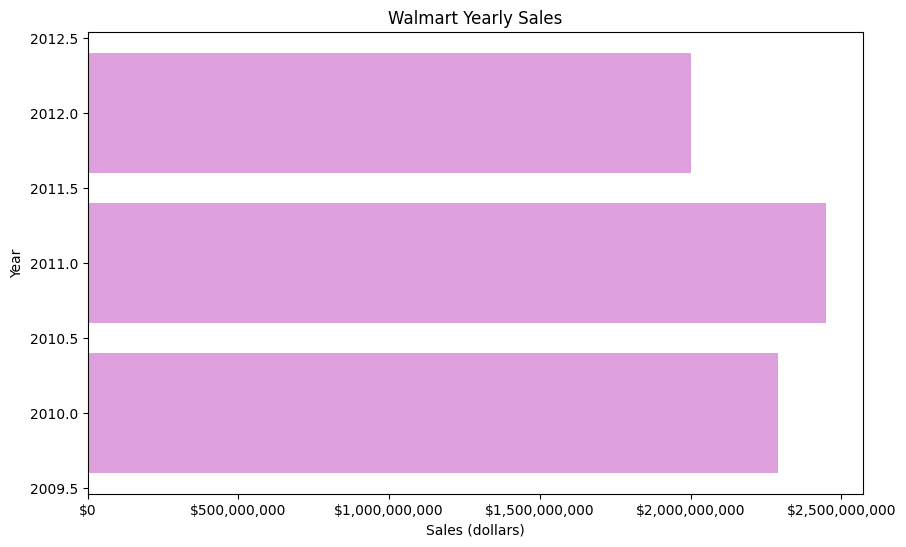

In [ ]:
import matplotlib.pyplot as plt

# Group data by year and calculate total sales
yearly_sales = wal.groupby('Year')['Weekly_Sales'].sum().reset_index()

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(yearly_sales['Year'], yearly_sales['Weekly_Sales'], color='plum')

# Set title and axis labels
ax.set(title='Walmart Yearly Sales', xlabel='Sales (dollars)', ylabel='Year')
ax.xaxis.set_major_formatter('${x:,.0f}')

# Display plot
plt.show()


STATISTICAL MODEL



*   Building prediction models to forecast demand (Linear Regression - Utilize variables like date and restructure dates as 1 for 5 feb 2010. Hypothesize if CPI, unemployement, and fuel price have any impact on sales.) Change dates into days by creating new varibales. Select model whic gives best accuracy.


In [ ]:
# Adding more columns

wal['Day']=pd.DatetimeIndex(wal['Date']).day
wal['Holiday'] = wal['Date'].apply(lambda date: assign_holiday(date))

wal.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Holiday
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,Not Holiday
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,Super Bowl
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,Not Holiday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,Not Holiday
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5,Not Holiday


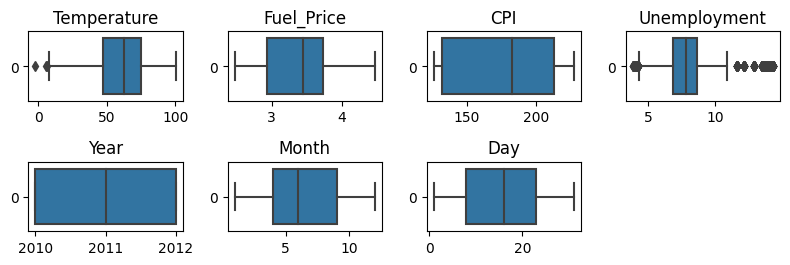

In [ ]:
# Checking for outlier and NaN values

features_list = 'Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day'.split(", ")

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8, 3), dpi=100)

for ax, feature in zip(axes.flatten(), features_list):
    sns.boxplot(wal[feature], orient='h', ax=ax)
    ax.set(title=f'{feature}')

for i in range(len(features_list), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
# Removing Outlier

def remove_out(feature):

    p25 = wal[feature].quantile(0.25)
    p75 = wal[feature].quantile(0.75)
    iqr = p75 - p25

    upper_limit = p75 + 1.5 * iqr
    lower_limit = p25 - 1.5 * iqr

    new_df = wal[(wal[feature] > lower_limit) & (wal[feature] < upper_limit)]

    return new_df

for feature in features_list:
    wal = remove_out(feature)
wal.shape

(5951, 12)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
wal['Holiday'] = ordinal_encoder.fit_transform(wal[['Holiday']])

print(ordinal_encoder.categories_)

[array(['Christmas', 'Labour Day', 'Not Holiday', 'Super Bowl',
       'Thanksgiving'], dtype=object)]


In [ ]:
wal.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Holiday
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,2.0
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,3.0
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,2.0
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,2.0
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5,2.0


In [ ]:
corr_matrix = wal.corr()
corr_matrix['Weekly_Sales'].sort_values(ascending = False)

Weekly_Sales    1.000000
Month           0.074373
Holiday         0.046274
Holiday_Flag    0.036672
Fuel_Price      0.011150
Day            -0.015058
Year           -0.034154
Temperature    -0.062210
Unemployment   -0.074868
CPI            -0.087470
Store          -0.322210
Name: Weekly_Sales, dtype: float64

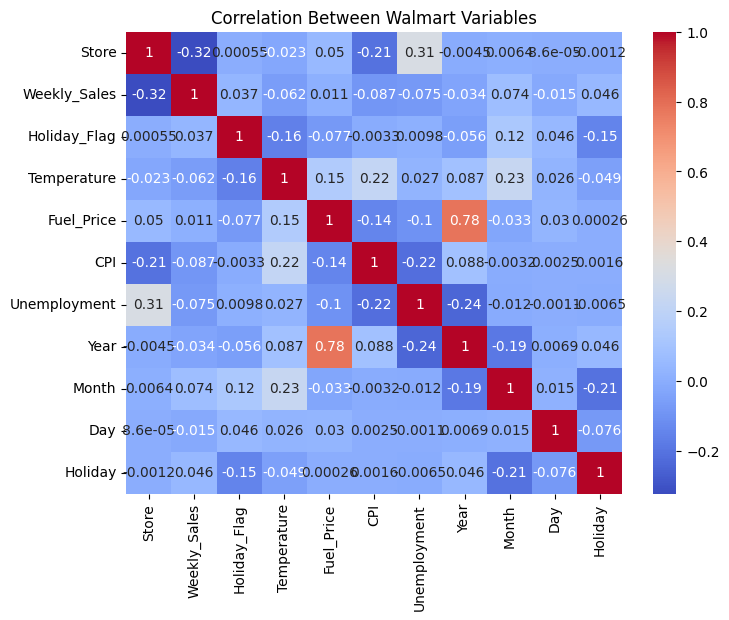

In [ ]:
# Calculate correlation matrix
corr = wal.corr()

# Create a heatmap chart
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Set title
ax.set(title='Correlation Between Walmart Variables')

# Display plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

features =  'Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, Holiday'.split(", ")
target= 'Weekly_Sales'

X = wal[features]
Y = wal[target]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.2)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

prediction = lin_reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

lin_rmse = np.sqrt(mean_squared_error(Y_test, prediction))
print("RSME:", lin_rmse)
print("Score:", lin_reg.score(X_train, Y_train) * 100,"%")

RSME: 558389.6085343064
Score: 3.4093597725212255 %


<Axes: ylabel='Weekly_Sales'>

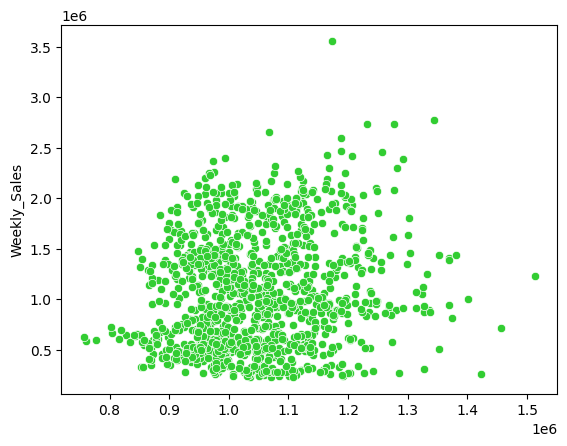

In [ ]:
sns.scatterplot(x=prediction, y=Y_test, color='limegreen')

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, Y_train)

tree_prediction = tree_reg.predict(X_test)
tree_rmse = np.sqrt(mean_squared_error(Y_test, tree_prediction))
print("RMSE:",tree_rmse)
print("Score:", tree_reg.score(X_train, Y_train) * 100, "%")

RMSE: 647301.5401329895
Score: 85.76234934948405 %


<Axes: ylabel='Weekly_Sales'>

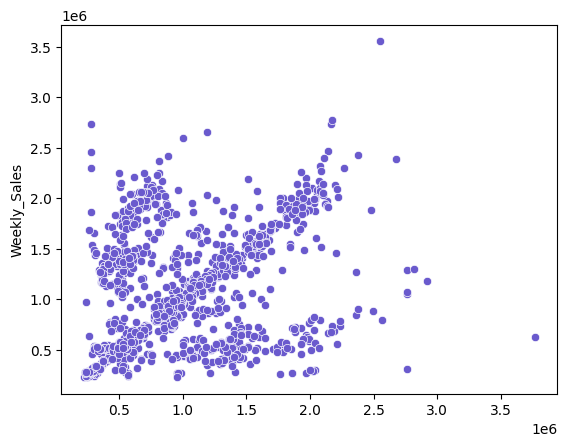

In [ ]:
sns.scatterplot(x=tree_prediction, y=Y_test , color = 'slateblue')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, Y_train)

forest_prediction = forest_reg.predict(X_test)
forest_rmse = np.sqrt(mean_squared_error(Y_test, forest_prediction))
print("RMSE:",forest_rmse)
print("Score:", forest_reg.score(X_train, Y_train) * 100, "%")

RMSE: 528234.2251038462
Score: 78.20685936525655 %


<Axes: ylabel='Weekly_Sales'>

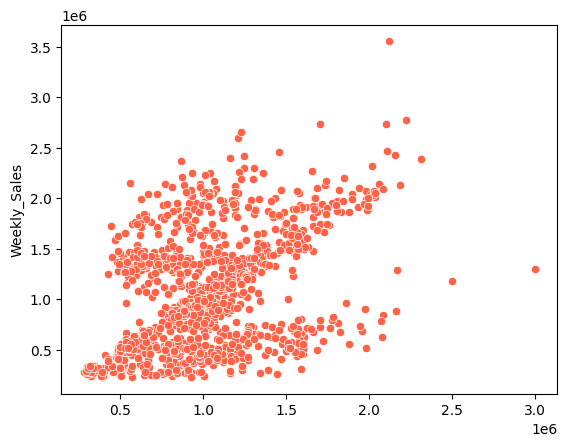

In [ ]:
sns.scatterplot(x=forest_prediction, y=Y_test , color = 'tomato')